In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import fmin_cg

import copy

%matplotlib inline

In [2]:
loc = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex5\ex5\ex5data1.mat'
mat = loadmat(loc)

In [3]:
x = mat['X']
y = mat['y']
xtest = mat['Xtest']
ytest = mat['ytest']
xval = mat['Xval']
yval = mat['yval']

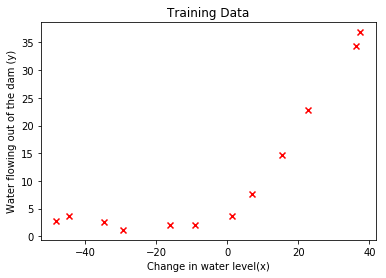

In [4]:
# visualize the training data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Training Data')
plot = ax.scatter(x, y, marker='x', c='red')
xlabel = ax.set_xlabel('Change in water level(x)')
ylabel = ax.set_ylabel('Water flowing out of the dam (y)')

In [5]:
# regularized linear reg cost
def costReg(theta, x, y, lam):
    # add x0 to x
    x = np.insert(x, 0, 1, axis = 1)
    m = x.shape[0]
    
    hx = np.dot(x, theta.T)
    loss = hx - y.flatten()
    
    j = (loss ** 2).sum() / 2 / m
    theta_reg = copy.copy(theta)
    theta_reg[0] = 0
    reg = (theta_reg ** 2).sum() * lam / 2 / m
    
    return j + reg

In [6]:
# test costReg
lam = 1
theta = np.ones(2)
testc = costReg(theta, x, y, lam)
testc

303.9931922202643

In [7]:
# regularized linear reg gradient
def gradReg(theta, x, y, lam):
    x = np.insert(x, 0, 1, axis = 1)
    m = x.shape[0]
    
    hx = np.dot(x, theta.T)
    loss = hx - y .flatten()
    
    grad = np.dot(loss.T, x) / m + theta * lam / m
    grad[0] = np.dot(loss.T, x[:, 0]) / m
    
    return grad

In [8]:
# test gradReg
testg = gradReg(theta, x, y, lam)
testg

array([-15.30301567, 598.25074417])

In [46]:
def trainLinearReg(x, y, lam):
    # initialize theta
    theta = np.ones(x.shape[1] + 1)
    myargs = (x, y, lam)
    
    #train = fmin_cg(costReg, theta, args = myargs, fprime = gradReg)
    
    # without convergence message
    train = fmin_cg(costReg, theta, args = myargs, fprime = gradReg, disp=0)
    
    return train

In [10]:
# test train func
theta_opt = trainLinearReg(x, y, 0)
theta_opt

array([13.08790734,  0.36777925])

In [11]:
xx = np.array([min(x), max(x)])
xx_mat = np.insert(xx, 0, 1, axis = 1)
yy = np.dot(xx_mat, theta_opt.T)
xx = xx.flatten()

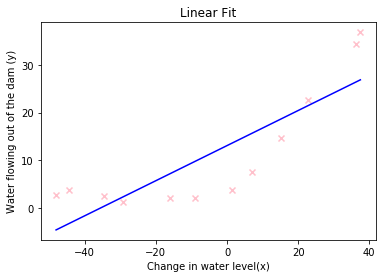

In [12]:
# plot the test fitted line
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Linear Fit')
plot = ax.scatter(x, y, marker='x', c='pink')
xlabel = ax.set_xlabel('Change in water level(x)')
ylabel = ax.set_ylabel('Water flowing out of the dam (y)')
line = ax.plot(xx, yy, c='blue')

In [98]:
# Bias-variance

In [13]:
def learningCurve(x, y, xval, yval, lam):
    err_train = np.zeros(x.shape[0])
    err_val = np.zeros(x.shape[0])
    for i in range(1, x.shape[0]+1):
        x_sub = x[:i, :]
        y_sub = y[:i, :]
        theta_train = trainLinearReg(x_sub, y_sub, lam)
        err_train[i-1] = costReg(theta_train, x_sub, y_sub, 0)
        err_val[i-1] = costReg(theta_train, xval, yval, 0)
        
    return err_train, err_val

In [14]:
err_t, err_v = learningCurve(x, y, xval, yval, 1)
err_t, err_v

(array([4.77260848e-29, 1.47960976e-05, 3.28661532e+00, 2.84268852e+00,
        1.31540521e+01, 1.94439654e+01, 2.00985238e+01, 1.81728602e+01,
        2.26094067e+01, 2.32614624e+01, 2.43172503e+01, 2.23739071e+01]),
 array([138.84677698, 110.64762237,  44.97199883,  48.33896411,
         35.85853128,  33.82265429,  31.96555141,  30.85861445,
         31.13283965,  28.93517405,  29.55104876,  29.433172  ]))

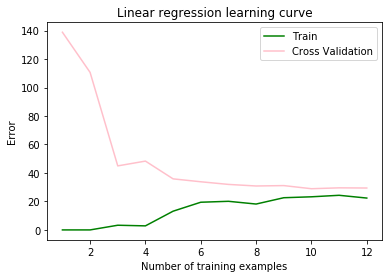

In [15]:
# plot learning curve
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Linear regression learning curve')
xlable = ax.set_xlabel('Number of training examples')
ylabel = ax.set_ylabel('Error')
plot1 = ax.plot(range(1,x.shape[0]+1), err_t, c='green', label='Train')
plot2 = ax.plot(range(1,x.shape[0]+1), err_v, c='pink', label='Cross Validation')
ax.legend()

In [117]:
# Polynomial Regression

In [16]:
def polyFeatures(x, p):
    x_poly = np.zeros(shape=(x.shape[0], p))
    x_poly[:, 0] = x.flatten().T
    if p > 1:
        for i in range(1,p):
            x_poly[:, i] = x.flatten().T ** (i + 1)
    else:
        print ("Wrong p value")
        pass
    return x_poly

In [17]:
# test polyFeatures func
testxx = np.array([1, 2, 3, 4, 5])
testxx_poly = polyFeatures(testxx, 3)
testxx_poly

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [18]:
testm = np.array([3, 4, 5])
testxx_poly / testm

array([[ 0.33333333,  0.25      ,  0.2       ],
       [ 0.66666667,  1.        ,  1.6       ],
       [ 1.        ,  2.25      ,  5.4       ],
       [ 1.33333333,  4.        , 12.8       ],
       [ 1.66666667,  6.25      , 25.        ]])

In [20]:
# pay attention to axis=0!!!
def featureNorm(x):
    mean = x.mean(axis = 0)
    std = x.std(axis = 0)
    x_norm = (x - mean) / std
    return x_norm, mean, std

In [69]:
# train polynomial regression
p = 8
lam = 0

x_poly = polyFeatures(x, p)
x_norm, mean, std = featureNorm(x_poly)

xval_poly = polyFeatures(xval, p)
xval_norm = (xval_poly - mean) / std

xtest_poly = polyFeatures(xtest, p)
xtest_norm = (xtest_poly - mean) / std

theta_train = trainLinearReg(x_norm, y, lam)
theta_train

array([ 11.21758779,   9.13741813,  18.19977433,  28.87502714,
       -27.35940177, -74.33824557,   6.99481632,  60.58941475,
        20.50070736])

In [34]:
xmin = x.min()
xmax = x.max()
plotx = np.linspace(xmin-30, xmax+10, num=50)
plotx_mat = polyFeatures(plotx, p)
plotx_mat = (plotx_mat - mean) / std
plotx_mat = np.insert(plotx_mat, 0, 1, axis = 1)
ploty = np.dot(plotx_mat, theta_train.T)

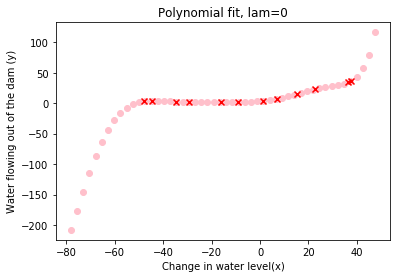

In [35]:
# plot the fitted line
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Polynomial fit, lam=0')
plotfit = ax.scatter(plotx, ploty, c='pink')
plot = ax.scatter(x, y, marker='x', c='red')
xlabel = ax.set_xlabel('Change in water level(x)')
ylabel = ax.set_ylabel('Water flowing out of the dam (y)')


In [51]:
err_t, err_v = learningCurve(x_norm, y, xval_norm, yval, 0)
err_t, err_v

(array([3.19488667e-29, 4.10330930e-29, 2.05843392e-29, 4.80651032e-09,
        2.55721186e-17, 1.80280536e-08, 7.00932848e-08, 3.71279653e-06,
        1.18694009e-06, 1.08329072e-02, 3.12189275e-02, 2.88909720e-02]),
 array([99.52344119, 99.48812827, 58.43562008, 56.70232406,  6.660889  ,
        10.68936582, 27.99137557, 22.59907308, 23.74052884, 94.48711137,
        50.92631452, 53.76395178]))

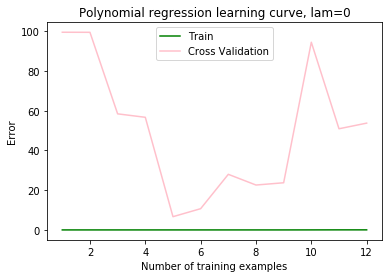

In [52]:
# plot learning curve
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Polynomial regression learning curve, lam=0')
xlable = ax.set_xlabel('Number of training examples')
ylabel = ax.set_ylabel('Error')
plot1 = ax.plot(range(1,x.shape[0]+1), err_t, c='green', label='Train')
plot2 = ax.plot(range(1,x.shape[0]+1), err_v, c='pink', label='Cross Validation')
ax.legend()

In [53]:
# pay attention to the error computation
# when lambda = 0, the costReg func makes sense here
def valCurve(x, y, xval, yval, lam_vec):
    err_train = np.zeros(len(lam_vec))
    err_val = np.zeros(len(lam_vec))
    for i in range(len(lamvec)):
        theta_train = trainLinearReg(x, y, lam_vec[i])
        err_train[i] = costReg(theta_train, x, y, 0)
        err_val[i] = costReg(theta_train, xval, yval, 0)
    
    return err_train, err_val

In [54]:
lamvec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
err_t, err_v = valCurve(x_norm, y, xval_norm, yval, lamvec)
err_t, err_v

(array([ 0.02889097,  0.10799466,  0.16684447,  0.21799262,  0.27515263,
         0.43866093,  0.86814322,  1.9586799 ,  4.52510059, 14.82578286]),
 array([53.76395178,  9.36109696, 15.94770292, 17.15224455, 13.2157458 ,
         7.92677138,  4.7608624 ,  4.26336454,  3.83217057,  8.88969265]))

In [62]:
print ('The optimal lambda is:', lamvec[err_v.argmin()])

The optimal lambda is: 3.0


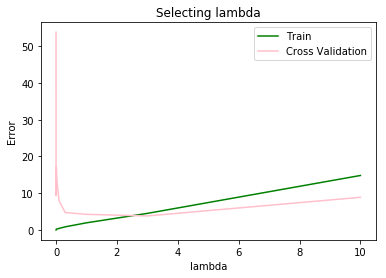

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Selecting lambda')
xlable = ax.set_xlabel('lambda')
ylabel = ax.set_ylabel('Error')
plot1 = ax.plot(lamvec, err_t, c='green', label='Train')
plot2 = ax.plot(lamvec, err_v, c='pink', label='Cross Validation')
ax.legend()

In [70]:
# calculate test error
lam_opt = lamvec[err_v.argmin()]
theta_test = trainLinearReg(xtest_norm, ytest, lam_opt)
err_test = costReg(theta_test, xtest_norm, ytest, 0)
err_test

2.3934182504039505

In [80]:
# randomly select sample for learning curve
def randCurve(x, y, xval, yval, lam):
    err_train = np.zeros(x.shape[0])
    err_val = np.zeros(x.shape[0])
    for i in range(1, x.shape[0]+1):
        # generate random index
        ind = np.random.choice(x.shape[0], size=i, replace=False)
        x_sub = x[ind, :]
        y_sub = y[ind, :]
        xval_sub = xval[ind, :]
        yval_sub = yval[ind, :]

        theta_train = trainLinearReg(x_sub, y_sub, lam)
        err_train[i-1] = costReg(theta_train, x_sub, y_sub, 0)
        #err_val[i-1] = costReg(theta_train, xval_sub, yval_sub, 0)
        err_val[i-1] = costReg(theta_train, xval, yval, 0)
        
    return err_train, err_val

In [95]:
err_t, err_v = randCurve(x_norm, y, xval_norm, yval, 0.01)
err_t, err_v

(array([4.59740987e-12, 1.51281708e-02, 1.05748942e-05, 2.12440361e-02,
        8.01212082e-02, 1.13684298e-01, 1.39633987e-01, 1.96581765e-01,
        1.73153628e-01, 2.06382532e-01, 2.33914451e-01, 2.17967442e-01]),
 array([138.86474905, 121.19800715, 123.50785998,  24.43746059,
         16.75093644,  20.83470587,  10.28551736,  14.56662115,
         15.10066856,   7.36767337,  17.60282361,  17.14542472]))

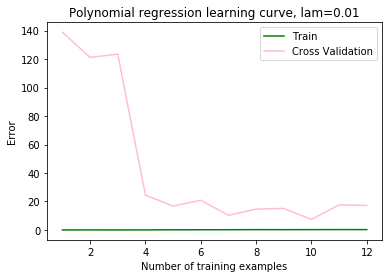

In [96]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Polynomial regression learning curve, lam=0.01')
xlable = ax.set_xlabel('Number of training examples')
ylabel = ax.set_ylabel('Error')
plot1 = ax.plot(range(1,x.shape[0]+1), err_t, c='green', label='Train')
plot2 = ax.plot(range(1,x.shape[0]+1), err_v, c='pink', label='Cross Validation')
ax.legend()